# Task 3: Customer Segmentation using K-Means
# Objective:
- Segment customers based on Age, Annual Income, and Spending Score using K-Means clustering to support business decision-making.


## Step 1: Import Required Libraries
- These libraries are required for: Pandas , seaborn,matplotlib,sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


## Step 2: Load the Dataset
- Confirms dataset is loaded correctly.

In [2]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-3\Dataset\customer_data.csv", encoding="latin1")
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,CustomerID,Age,Annual Income,Spending Score
0,1,56,72733,36
1,2,46,85318,45
2,3,32,109474,20
3,4,60,43664,65
4,5,25,87172,8


## Step 3: Feature Scaling using StandardScaler
- StandardScaler() normalizes the data
- scaled_data contains standardized numerical values

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age','Annual Income','Spending Score']])

## Step 4: Determining Optimal Number of Clusters using Elbow Method
- wcss stores Within-Cluster Sum of Squares (cluster compactness).

- The loop runs K-Means for 1 to 10 clusters.

- kmeans.inertia_ gives the WCSS value for each cluster count.

- The Elbow Method graph is plotted:
   - X-axis → Number of clusters (K)
   - Y-axis → WCSS

- The optimal number of clusters is where the curve forms an “elbow”

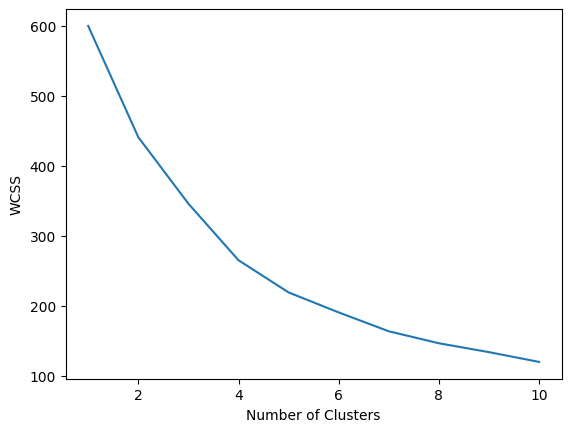

In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Step 5: Applying K-Means Clustering
- KMeans(n_clusters=4) creates 4 clusters.

- fit_predict(scaled_data):

- Fits the K-Means model

- Assigns a cluster label (0–3) to each data point

- df['Cluster'] stores the assigned cluster for each row.

- df.head() displays the first 5 rows with cluster labels.

In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df.head()

,CustomerID,Age,Annual Income,Spending Score,Cluster
0,1,56,72733,36,2
1,2,46,85318,45,2
2,3,32,109474,20,1
3,4,60,43664,65,0
4,5,25,87172,8,1


## Step 6: Cluster Visualization using Principal Component Analysis (2D-Scatter Plot)
- PCA(n_components=2) reduces the data to 2 dimensions.

- fit_transform(scaled_data) converts high-dimensional data into PCA1 and PCA2.

- plt.scatter(...) plots data points in 2D space.

- c=df['Cluster'] colors points based on their cluster assignment.

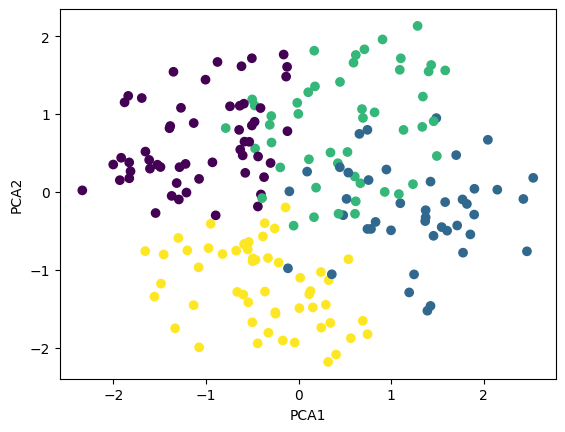

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['Cluster'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Step 7: Pair Ploat - Relationships Between Features Within Clusters
- sns.pairplot() creates pairwise scatter plots for the selected features.

- vars shows relationships between Age, AnnualIncome, and SpendingScore.

- hue='Cluster' colors data points by cluster label.

- Helps visually compare clusters across all feature combinations.

KeyError: 'AnnualIncome'

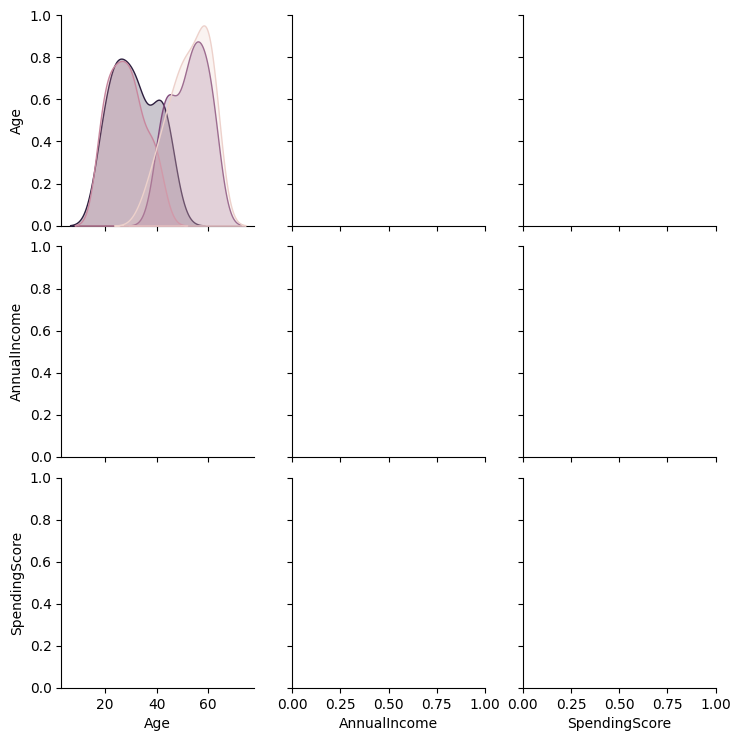

In [7]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'AnnualIncome', 'SpendingScore'])
plt.show()

## Step 8: Cluster Analysis
- groupby('Cluster') groups data by cluster labels.

- mean() calculates the average Age, AnnualIncome, and SpendingScore for each cluster.

- Helps understand cluster characteristics and compare customer groups.

In [ ]:
df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore']].mean()

,Age,AnnualIncome,SpendingScore
Cluster,,,
0,52.618182,39473.090909,52.763636
1,28.209302,82688.720930,24.279070
2,52.437500,92990.270833,40.250000
3,31.296296,62682.259259,81.611111


### Insights & Recommendations

- High income & high spending clusters should be targeted with premium products.
- Low spending clusters can be encouraged through discounts and offers.
- Younger customers are suitable for digital marketing campaigns.
- Loyal high-spending customers should receive loyalty rewards and memberships.
